In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [19]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [20]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [21]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 5s 5ms/step - loss: 0.3600 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.1935 - val_sparse_categorical_accuracy: 0.9441
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.1420 - val_sparse_categorical_accuracy: 0.9587
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.1173 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1100 - val_sparse_categorical_accuracy: 0.9677
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0935 - val_sparse_categorical_accuracy: 0.9706
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0890 - val_sparse_categorical_accuracy: 0.9725
Epoch 6/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0611 - sparse_categorical_accu

In [6]:
model.save("mnist_marugan.h5")

In [11]:
converter = tf.lite.TFLiteConverter.from_saved_model("mnist_marugan")
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

1/1 [==============================] - 0s 33ms/step
Resultado predecido es: 3


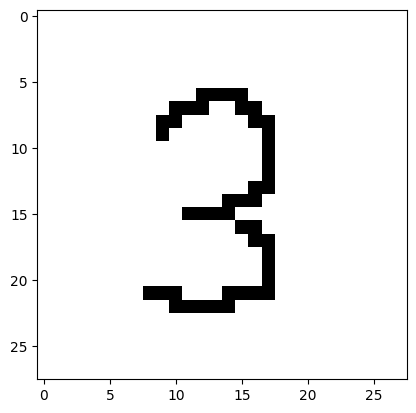

In [29]:
img = cv.imread('3.png')[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f'Resultado predecido es: {np.argmax(prediction)}')
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()